In [1]:
#Criação de um modelo preditivo capaz de prever se uma pessoa pode ou não desenvolver diabetes. 
#Para isso, usaremos dados históricos de pacientes, disponíveis no dataset abaixo:
#Dataset: Pima Indians Diabetes Data Set http://archive.ics.uci.edu/ml/datasets/diabetes


In [2]:
import sklearn as sl
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sl.__version__

'0.24.1'

In [3]:
#Carregando arquivo csv usando Numpy
from pandas import read_csv
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values
print(dados.shape)

(768, 9)


In [4]:
dados.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
#verificar tipos dos dados
dados.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [6]:
dados.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#distribuição de classes.
dados.groupby('class').size()

class
0    500
1    268
dtype: int64

In [8]:
#Correlação entre as variáveis
dados.corr(method = 'pearson')

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


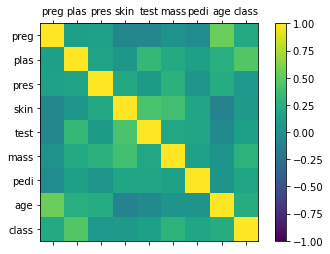

In [9]:
#matriz de correlação com nomes das variáveis
correlations = dados.corr()
#plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(colunas)
ax.set_yticklabels(colunas)
plt.show()

In [10]:
#Verificando o skew(assimetria) de cada atributo
dados.skew()

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64

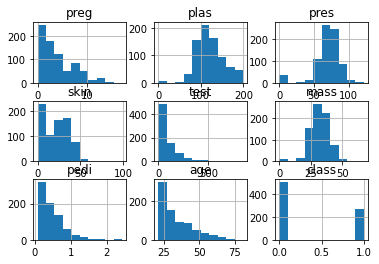

In [11]:
#histograma univariado
dados.hist()
plt.show()

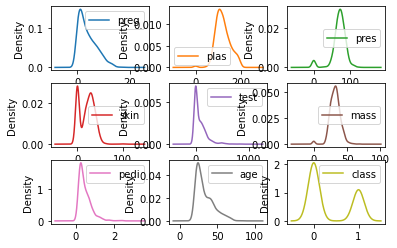

In [12]:
#Density Plot Univariado
dados.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

In [13]:
dados.min()

preg      0.000
plas      0.000
pres      0.000
skin      0.000
test      0.000
mass      0.000
pedi      0.078
age      21.000
class     0.000
dtype: float64

In [14]:
#Colunas com valores nulos
dados.isnull().any()

preg     False
plas     False
pres     False
skin     False
test     False
mass     False
pedi     False
age      False
class    False
dtype: bool

<AxesSubplot:>

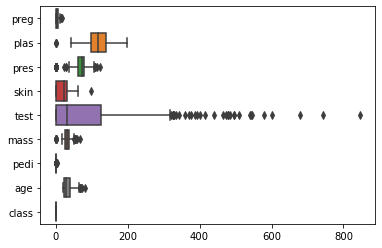

In [15]:
#Boxplot para verificar outliers
sn.boxplot(data = dados, orient = "h")

In [16]:
#Seleção de variáveis por Eliminação Recursiva de Variáveis

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#Criação do modelo
modelo = LogisticRegression()

#Separando o array em componentes de input e output
X = array[:, 0:8]
Y = array[:,8]

#RFE
rfe = RFE(modelo, 6)
fit = rfe.fit(X,Y)

print("Variáveis preditoras: ", dados.columns[0:8])
print("Variáveis selecionadas: %s" % fit.support_)
print("Rankin dos atributos: %s" % fit.ranking_)
print("Números de Melhores Atributos: %d" % fit.n_features_)         


Variáveis preditoras:  Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')
Variáveis selecionadas: [ True  True  True False False  True  True  True]
Rankin dos atributos: [1 1 1 2 3 1 1 1]
Números de Melhores Atributos: 6


In [17]:
sub_valor = dados['mass'].mean()
dados['mass'] = dados['mass'].replace(to_replace = 0, value = sub_valor)

In [18]:
sub_valor = dados['pres'].mean()
dados['pres'] = dados['pres'].replace(to_replace = 0, value = sub_valor)

In [19]:
sub_valor = dados['plas'].median()
dados['plas'] = dados['plas'].replace(to_replace = 0, value = sub_valor)

In [20]:
#Removendo as colunas pres, skin, test
dados.drop(['skin', 'test'], axis = 1, inplace = True)
array2 = dados.values

In [21]:
#Pacote para Normalização
from sklearn.preprocessing import MinMaxScaler

# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", dados.values)
print("\nDados Normalizados: \n\n", rescaledX[0:5,:])

Dados Originais: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

Dados Normalizados: 

 [[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25362938 0.18333333]
 [0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
  0.03800171 0.        ]
 [0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
  0.94363792 0.2       ]]


In [22]:
#Pacote para padronização dos dados (0 para média e 1 para desvio padrão)
from sklearn.preprocessing import StandardScaler

#Gerando o novo padrão
scaler = StandardScaler().fit(X)
StandardX = scaler.transform(X)

#Sumarizando os dados transformados
print("Dados originais: \n\n", dados.values)
print("Dados padronizados: \n\n", StandardX[0:5,:])

Dados originais: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]
Dados padronizados: 

 [[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]


In [23]:
dados.head()

,preg,plas,pres,mass,pedi,age,class
0,6,148,72.0,33.6,0.627,50,1
1,1,85,66.0,26.6,0.351,31,0
2,8,183,64.0,23.3,0.672,32,1
3,1,89,66.0,28.1,0.167,21,0
4,0,137,40.0,43.1,2.288,33,1


In [24]:
dados.shape

(768, 7)

LR: 0.765486 (0.075019)
LDA: 0.768117 (0.074820)
NB: 0.752699 (0.079252)
KNN: 0.743556 (0.068970)
CART: 0.718893 (0.053281)
SVM: 0.761572 (0.065979)


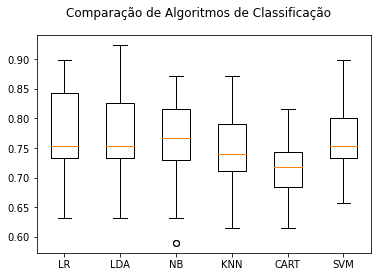

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

X = array2[:,0:6]
Y = array2[:,6]

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))

#Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = 20, random_state = 5, shuffle=True)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

#Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

In [26]:
#otimização
from sklearn.model_selection import GridSearchCV
# Definindo os valores que serão testados
valores_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

# Criando o modelo
modelo = LogisticRegression()

# Criando o grid
grid = GridSearchCV(estimator = modelo, param_grid = valores_grid)
grid.fit(X, Y)

# Print do resultado
print("Acurácia: %.3f" % (grid.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", grid.best_estimator_)

Acurácia: 76.827
Melhores Parâmetros do Modelo:
 LogisticRegression(C=0.01)


In [27]:
#Salvar o modelo
from sklearn.model_selection import train_test_split
import pickle

# Definindo o tamanho dos dados de treino e de teste
teste_size = 0.33
seed = 7

# Criando o dataset de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()

# Treinando o modelo
modelo.fit(X_treino, Y_treino)

# Salvando o modelo
arquivo = 'modelo/modelo_classificador_final.sav'
pickle.dump(modelo, open(arquivo, 'wb'))
print("Modelo salvo!")

# Carregando o arquivo
modelo_classificador_final = pickle.load(open(arquivo, 'rb'))
modelo_prod = modelo_classificador_final.score(X_teste, Y_teste)
print("Modelo carregado!")

# Print do resultado
print("Acurácia: %.3f" % (modelo_prod.mean() * 100))

Modelo salvo!
Modelo carregado!
Acurácia: 76.772
